<a href="https://colab.research.google.com/github/beruscoder/pytorchprojects/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch 0, loss 28.5769
epoch 20, loss 6.7641
epoch 40, loss 5.7826
epoch 60, loss 4.9435
epoch 80, loss 4.2262


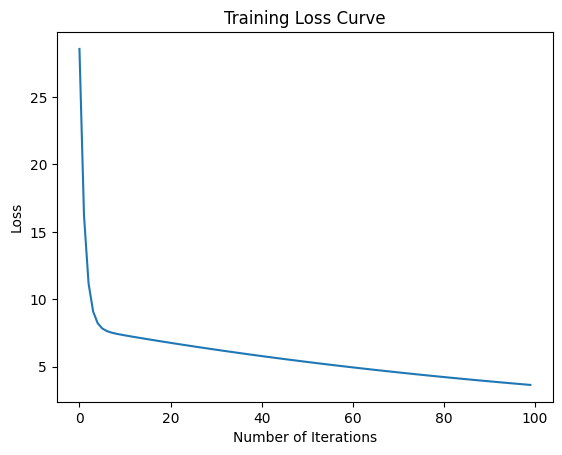

Weight: 0.403798907995224
Bias: 2.9894049167633057


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# -------------------- Data --------------------
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32).reshape(-1, 1)
car_price_tensor = torch.from_numpy(car_price_np)

number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32).reshape(-1, 1)
number_of_car_sell_tensor = torch.from_numpy(number_of_car_sell_np)

# -------------------- Model --------------------
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# -------------------- Loss & Optimizer --------------------
mse = nn.MSELoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# -------------------- Training --------------------
loss_list = []
iteration_number = 100
for iteration in range(iteration_number):
    optimizer.zero_grad()

    results = model(car_price_tensor)
    loss = mse(results, number_of_car_sell_tensor)

    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    if iteration % 20 == 0:
        print(f"epoch {iteration}, loss {loss.item():.4f}")

# -------------------- Plot Loss --------------------
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# Final learned parameters
print("Weight:", model.linear.weight.item())
print("Bias:", model.linear.bias.item())
